In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import math
import seaborn as sn
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

In [321]:
import warnings
warnings.filterwarnings('ignore')

In [322]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

In [323]:
test.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_256      0
label_1        750
label_2        750
label_3        750
label_4        750
Length: 260, dtype: int64

In [324]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [325]:
# Separate features and labels
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = test[['label_1', 'label_2', 'label_3', 'label_4']]

In [326]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [327]:
knn = KNeighborsClassifier(n_neighbors=1)
def knn_classifier(X_train, Y_train, X_val, Y_val):
    knn.fit(np.array(X_train), Y_train)

    y_pred = knn.predict(np.array(X_val))

    accuracy = accuracy_score(Y_val, y_pred)
    return accuracy

### Label_1

Text(0.5, 0, 'Speaker ID')

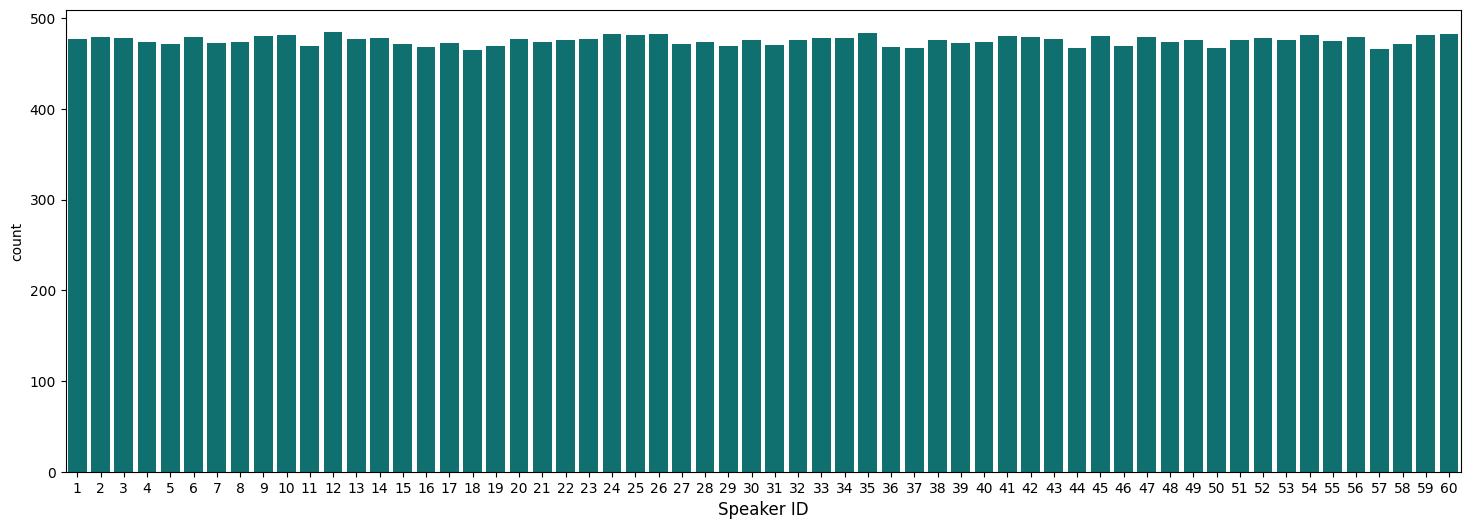

In [328]:
plt.figure(figsize=(18, 6))
sn.countplot(data=y_train, x='label_1', color='teal')
plt.xlabel('Speaker ID', fontsize=12)

In [329]:
accuracy = knn_classifier(X_train, y_train['label_1'], X_val, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.93%


In [330]:
label_1_pred_before = knn.predict(np.array(X_test))

In [331]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [332]:
def correlation_with_label(dataset, label, thereshold = 0.01):

    corr_matrix = dataset.corr()
    label_col_id = corr_matrix.columns.get_loc(label)

    corr_with_label = corr_matrix.iloc[:, label_col_id]

    corr_fearures = corr_with_label[corr_with_label.index != label]
    corr_fearures = corr_fearures[corr_fearures.abs() < thereshold]

    return corr_fearures.index.tolist()

In [333]:
train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556,0.196835,-0.054773,0.012352,-0.027306
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253,-0.070909,-0.083949,-0.038166,-0.112111
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783,-0.092739,0.122517,0.305422,0.103653
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500,0.009204,-0.005010,-0.117647,0.080519
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442,0.068396,0.068817,0.068270,0.025991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_256,-0.046556,-0.146253,0.045783,-0.310500,0.078442,0.137188,-0.264550,-0.258903,0.212040,-0.238555,...,-0.355017,0.401299,-0.146592,-0.262347,0.179979,1.000000,0.019870,0.021947,0.361959,0.080645
label_1,0.196835,-0.070909,-0.092739,0.009204,0.068396,-0.089151,0.026829,-0.058984,0.119387,0.120220,...,0.036830,-0.068237,0.016891,0.163097,0.216063,0.019870,1.000000,-0.038758,-0.403477,-0.021115
label_2,-0.054773,-0.083949,0.122517,-0.005010,0.068817,0.089700,-0.092337,-0.090452,0.093125,0.010411,...,-0.008342,0.025528,-0.079649,0.028317,0.015842,0.021947,-0.038758,1.000000,0.086053,0.242613
label_3,0.012352,-0.038166,0.305422,-0.117647,0.068270,0.237470,-0.085678,-0.052134,0.040492,-0.092567,...,-0.084131,0.151066,-0.026967,-0.012616,-0.129308,0.361959,-0.403477,0.086053,1.000000,0.016825


In [334]:
corr_features = correlation_with_label(train, 'label_1', 0.01)
len(set(corr_features))

14

In [335]:
X_train_filtered = X_train.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [336]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

53

In [337]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [338]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [339]:
accuracy = knn_classifier(X_train_scaled, y_train['label_1'], X_val_scaled, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.53%


In [340]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [341]:
X_train_pca.shape

(28520, 64)

In [342]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'] )
    if accuracy_val < 0.98:
        break
 
print (min_shape)

64


In [343]:
pca = PCA(n_components=49, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [344]:
X_train_pca.shape

(28520, 49)

In [345]:
accuracy = knn_classifier(X_train_pca, y_train['label_1'], X_val_pca, y_val['label_1'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.00%


In [346]:
label_1_pred_after = knn.predict(np.array(X_test_pca))

In [347]:
label1_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label1_features.insert(0,'Predicted labels before feature engineering',label_1_pred_before)
label1_features.insert(1,'Predicted labels after feature engineering', label_1_pred_after)
label1_features.insert(2,'No of new features', X_test_pca.shape[1])

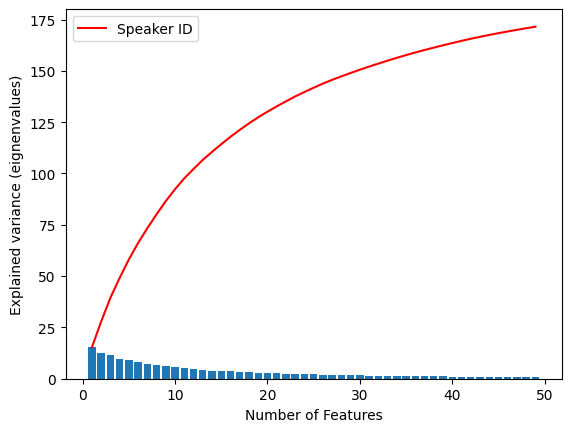

In [348]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Speaker ID')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
 
plt.show()

### Label_2

In [349]:
valid['label_2'].isnull().sum()

14

In [350]:
label2_train = train.copy()
label2_valid = valid.copy()
label2_test = test.copy()

In [351]:
label2_train = label2_train.dropna(subset=['label_2'])
label2_valid = label2_valid.dropna(subset=['label_2'])

In [352]:
label2_train['label_2'].head()

480    25.0
481    25.0
482    25.0
483    25.0
484    25.0
Name: label_2, dtype: float64

In [353]:
X_train = label2_train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = label2_train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = label2_valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = label2_valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = label2_test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = label2_test[['label_1', 'label_2', 'label_3', 'label_4']]

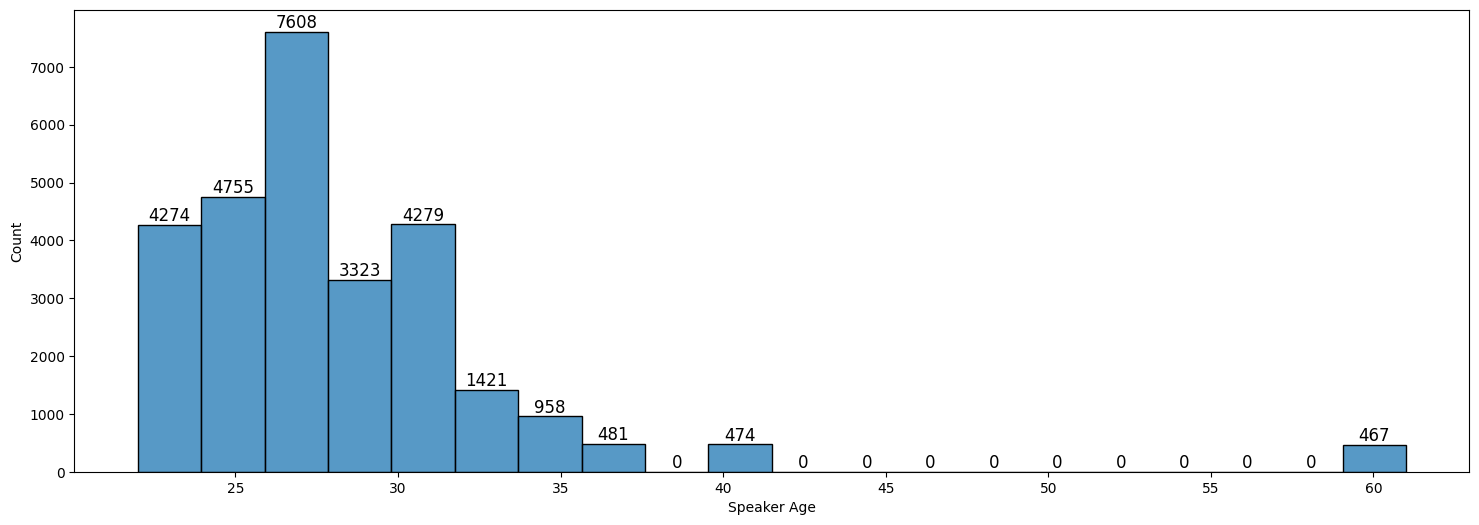

In [354]:
plt.figure(figsize=(18, 6))
ax = sn.histplot(data=y_train, x='label_2', bins=20, kde=False)
plt.xlabel('Speaker Age')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.show()

In [355]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train['label_2'])
y_pred = model.predict(X_val)
testScore = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.29 RMSE


In [356]:
label_2_pred_before = model.predict(np.array(X_test))

In [357]:
label2_train_filtered = label2_train[label2_train['label_2'] < 45]
X_train_filtered = label2_train_filtered.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train_filtered = label2_train_filtered[['label_1', 'label_2', 'label_3', 'label_4']]

model = xgb.XGBRegressor()
model.fit(X_train_filtered, y_train_filtered['label_2'])
y_pred = model.predict(X_val)
testScore = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.95 RMSE


In [358]:
corr_features = correlation_with_label(label2_train, 'label_2')
len(set(corr_features))

25

In [359]:
X_train_filtered = X_train.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [360]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

53

In [361]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [362]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [363]:
pca = PCA(n_components=0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [364]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    model = xgb.XGBRegressor()
    model.fit(X_train_pca, y_train['label_2'])
    y_pred = model.predict(X_val_pca)
    testScore_val = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
    if testScore_val > 3.8:
        break
 
print (min_shape)   
    

25


In [365]:
pca = PCA(n_components=25, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [366]:
model = xgb.XGBRegressor()
model.fit(X_train_pca, y_train['label_2'])
y_pred = model.predict(X_val_pca)
testScore = math.sqrt(mean_squared_error(y_val['label_2'], y_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 3.76 RMSE


In [367]:
label_2_pred_after = model.predict(np.array(X_test_pca))

In [368]:
label2_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label2_features.insert(0,'Predicted labels before feature engineering',label_2_pred_before)
label2_features.insert(1,'Predicted labels after feature engineering', label_2_pred_after)
label2_features.insert(2,'No of new features', X_test_pca.shape[1])

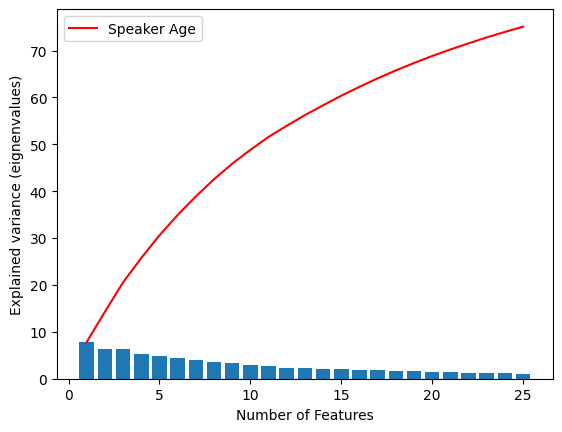

In [369]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Speaker Age')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
 
plt.show()

### Label_3

In [370]:
# Separate features and labels
X_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
X_val = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_val = valid[['label_1', 'label_2', 'label_3', 'label_4']]
X_test = test.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y_test = test[['label_1', 'label_2', 'label_3', 'label_4']]

In [371]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,2.029255,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,1.260712,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,0.223475,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.970327,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,1.291582,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606


In [372]:
tr_df = train.copy()
tr_df = tr_df.drop(['label_1', 'label_2', 'label_4'], axis=1)
val_df = valid.copy()
val_df = val_df.drop(['label_1', 'label_2', 'label_4'], axis=1)
tr_df = tr_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [373]:
tr_df.merge(val_df, on=list(tr_df.columns))

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_3
0,0.390797,-0.013814,-0.642851,1.110670,1.205050,-0.725583,-1.041215,0.905019,0.808372,-1.508635,...,-0.560298,-0.090331,-1.686642,0.807624,0.726422,1.881574,0.539267,1.204524,-3.211001,0
1,-1.125404,-0.135790,-1.683260,1.517334,0.403924,-0.976667,-0.685010,-0.042173,-0.234633,-2.291023,...,1.894376,1.757008,-1.164340,-0.165481,0.522499,1.141182,-1.509640,2.596560,-2.350392,0


Text(0.5, 0, 'Speaker Gender')

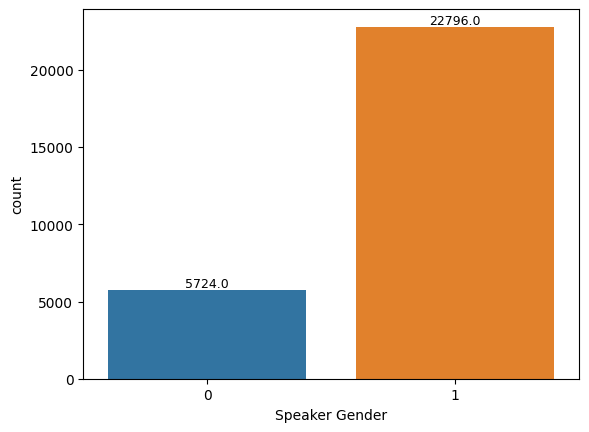

In [374]:
ax = sn.countplot(x=y_train['label_3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.xlabel('Speaker Gender')


In [375]:
accuracy = knn_classifier(X_train, y_train['label_3'], X_val, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [376]:
label_3_pred_before = knn.predict(np.array(X_test))

In [377]:
ros = RandomOverSampler(random_state=0, sampling_strategy=0.75)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_3'])

Text(0.5, 0, 'Speaker Gender')

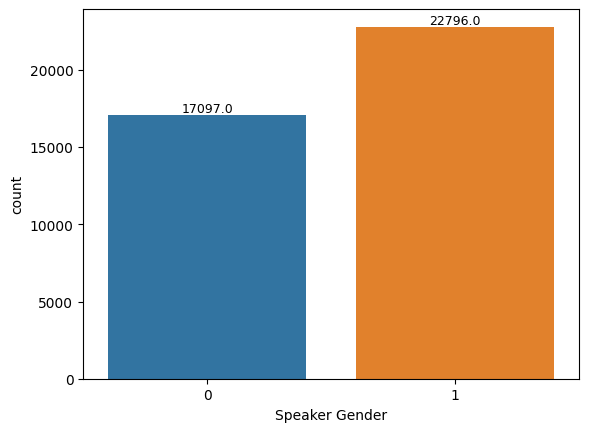

In [378]:
ax = sn.countplot(x=y_train_resampled)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)
    
plt.xlabel('Speaker Gender')

In [379]:
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [380]:
corr_features = correlation_with_label(train, 'label_3', 0.01)
len(set(corr_features))

4

In [381]:
X_train_filtered = X_train_resampled.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [382]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

60

In [383]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [384]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [385]:
accuracy = knn_classifier(X_train_scaled, y_train_resampled, X_val_scaled, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [386]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [387]:
X_train_pca.shape[1]

64

In [388]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
    if accuracy_val < 1:
        break
 
print (min_shape)
    

25


In [389]:
pca = PCA(n_components=35, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [390]:
accuracy = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [391]:
label_3_pred_after = knn.predict(np.array(X_test_pca))

In [392]:
label3_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label3_features.insert(0,'Predicted labels before feature engineering',label_3_pred_before)
label3_features.insert(1,'Predicted labels after feature engineering', label_3_pred_after)
label3_features.insert(2,'No of new features', X_test_pca.shape[1])

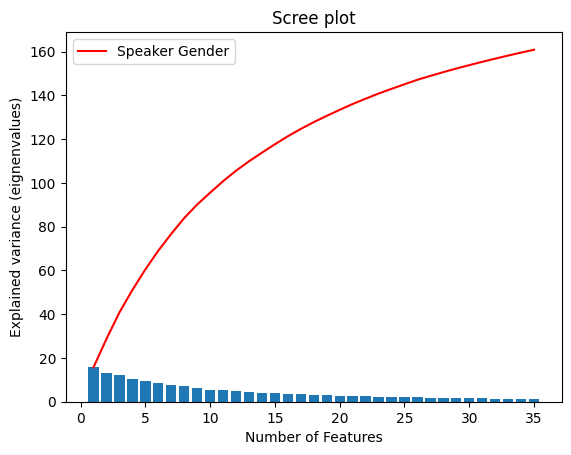

In [393]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Speaker Gender')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

### Label_4

Text(0.5, 0, 'Speaker Accent')

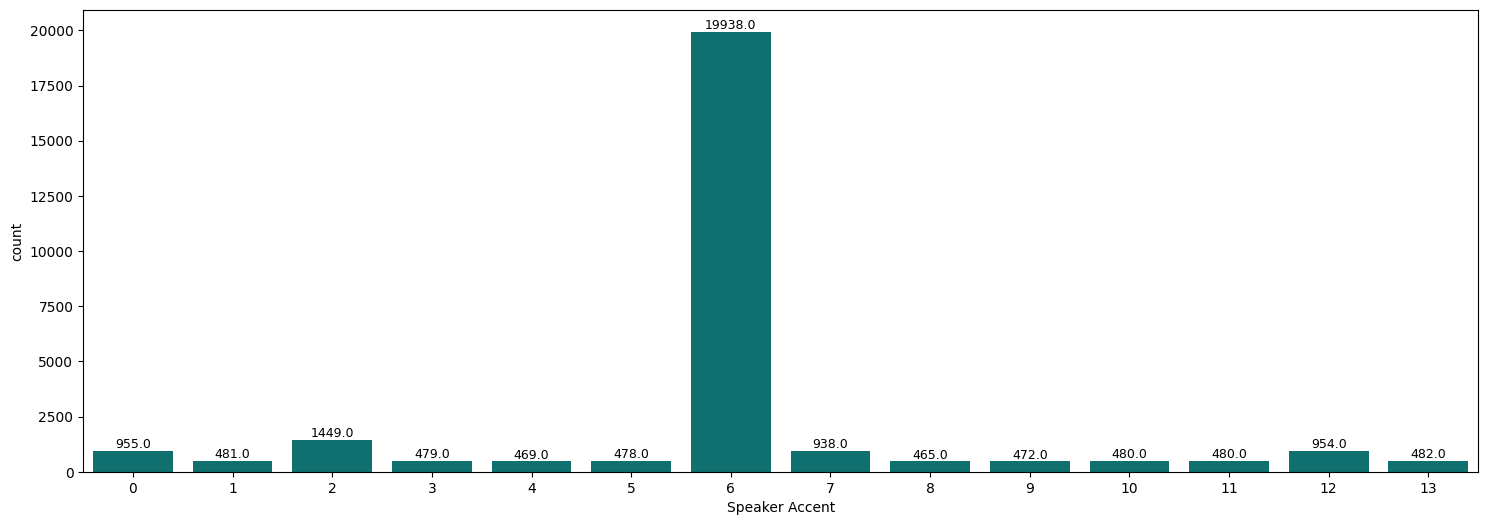

In [394]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train['label_4'], color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.xlabel('Speaker Accent')

In [395]:
accuracy = knn_classifier(X_train, y_train['label_4'], X_val, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.60%


In [396]:
label_4_pred_before = knn.predict(np.array(X_test))

In [397]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train['label_4'])

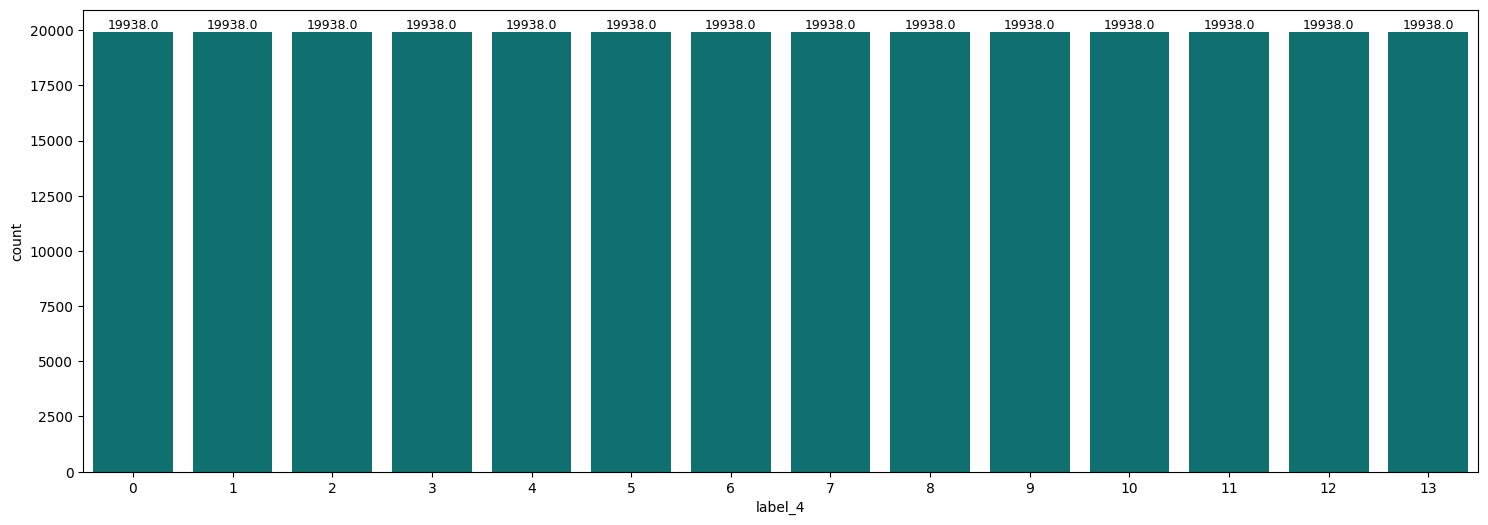

In [398]:
plt.figure(figsize=(18, 6))
ax = sn.countplot(x=y_train_resampled, color='teal')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

In [399]:
accuracy = knn_classifier(X_train_resampled, y_train_resampled, X_val, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.60%


In [400]:
corr_features = correlation_with_label(train, 'label_4', 0.01)
len(set(corr_features))

25

In [401]:
X_train_filtered = X_train_resampled.drop(columns=list(corr_features))
X_val_filtered = X_val.drop(columns=list(corr_features))
X_test_filtered = X_test.drop(columns=list(corr_features))

In [402]:
corr_features = correlation(X_train_filtered, 0.5)
len(set(corr_features))

65

In [403]:
X_train_filtered = X_train_filtered.drop(columns=list(corr_features))
X_val_filtered = X_val_filtered.drop(columns=list(corr_features))
X_test_filtered = X_test_filtered.drop(columns=list(corr_features))

In [404]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [405]:
accuracy = knn_classifier(X_train_scaled, y_train_resampled, X_val_scaled, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.33%


In [406]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [407]:
X_train_pca.shape[1]

61

In [408]:
min_shape = 256
while True:
    pca = PCA(n_components=0.95, svd_solver='full')
    min_shape = X_train_pca.shape[1]
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)
    X_test_pca = pca.transform(X_test_pca)
    accuracy_val = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_3'] )
    if accuracy_val < 0.985:
        break
 
print (min_shape)


61


In [409]:
pca = PCA(n_components=34, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [410]:
X_train_pca

array([[-1.3998622 ,  5.91707934,  1.70119745, ...,  1.0554763 ,
        -0.47122485,  0.21806237],
       [-3.52474068,  2.8364303 , -4.06755299, ..., -1.21813452,
        -0.55115006, -1.25955371],
       [-4.36341062,  4.17748773, -4.37002762, ..., -1.72113185,
         2.53085451,  0.74464176],
       ...,
       [ 1.18375297, -2.74536167, -3.3948166 , ...,  0.14757486,
        -0.87912211,  0.07010916],
       [ 0.37743006, -2.56393727, -5.50840547, ..., -0.55508982,
         1.26388154, -0.76378497],
       [-2.54858343, -3.97058925, -1.56945451, ..., -0.65679228,
        -1.40136389, -0.80957527]])

In [411]:
accuracy = knn_classifier(X_train_pca, y_train_resampled, X_val_pca, y_val['label_4'] )
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.67%


In [412]:
label_4_pred_after = knn.predict(np.array(X_test_pca))

In [413]:
label4_features = pd.DataFrame(data=X_test_pca, columns=[f'new_feature_{i+1}' for i in range(X_test_pca.shape[1])])
label4_features.insert(0,'Predicted labels before feature engineering',label_4_pred_before)
label4_features.insert(1,'Predicted labels after feature engineering', label_4_pred_after)
label4_features.insert(2,'No of new features', X_test_pca.shape[1])

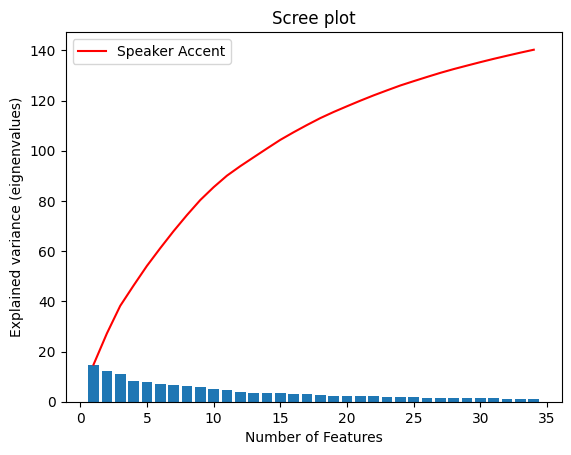

In [414]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Speaker Accent')
 
plt.legend(loc='upper left')
plt.xlabel('Number of Features')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

### Generating Output

In [415]:
label4_features.shape[0]

750

In [416]:
def write_csv(feature_df, label):
  for i in range(feature_df['No of new features'][0], 256):
        feature_df[f'new_feature_{i+1}'] = [0] * (feature_df.shape[0])
  filename = f'output/190331A_label_{label}.csv'
  feature_df.to_csv(filename, index=False)

In [417]:
write_csv(label1_features.copy(), 1)
write_csv(label2_features.copy(), 2)
write_csv(label3_features.copy(), 3)
write_csv(label4_features.copy(), 4)